<a href="https://colab.research.google.com/github/shrikant131/FeatureEngineering/blob/optimize-feature-engineering/feature_engineering1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering on DK Housing Prices Dataset

## Identification of Attribute Types

In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Load the dataset
df = pd.read_csv('DKHousingPricesSample100k.csv')

# Display the first few rows of the dataset
df.head()

,date,quarter,house_id,house_type,sales_type,year_build,purchase_price,%_change_between_offer_and_purchase,no_rooms,sqm,sqm_price,address,zip_code,city,area,region,nom_interest_rate%,dk_ann_infl_rate%,yield_on_mortgage_credit_bonds%
0,2024-10-24,2024Q4,16,Villa,regular_sale,1997,6500000,-3.0,5,142.0,45774.650,Spættevej 16,2680,Solrød Strand,"Capital, Copenhagen",Zealand,3.1,NaN,NaN
1,2024-10-24,2024Q4,13,Apartment,regular_sale,1885,3400000,0.0,2,46.0,73913.050,"Jakob Dannefærds Vej 10B, 4. th",1973,Frederiksberg C,"Capital, Copenhagen",Zealand,3.1,NaN,NaN
2,2024-10-23,2024Q4,60,Villa,regular_sale,1949,4550000,-4.0,4,112.0,40625.000,Vestre Plantagevej 3,2680,Solrød Strand,"Capital, Copenhagen",Zealand,3.1,NaN,NaN
3,2024-10-23,2024Q4,29,Villa,regular_sale,2001,1630000,-12.0,4,186.0,8763.440,Toftebjerg 3,4400,Kalundborg,Other islands,Zealand,3.1,NaN,NaN
4,2024-10-22,2024Q4,92,Apartment,regular_sale,1965,1975000,-10.0,3,82.0,24085.365,"Ryttergårdsvej 20, 1. 113",3520,Farum,North Zealand,Zealand,3.1,NaN,NaN


## Handling Missing Data

In [30]:
# Check for missing data
missing_data = df.isnull().sum()
missing_data[missing_data > 0]

,0
city,11
dk_ann_infl_rate%,77
yield_on_mortgage_credit_bonds%,77


### Explanation: Handling missing data is crucial to ensure the integrity of the dataset. We will use different techniques such as imputation or removal based on the nature and amount of missing data.

In [31]:
# Process the quarter column to ensure consistency
df['quarter'] = df['quarter'].apply(lambda x: f'Q{x}' if isinstance(x, int) else x)
df['quarter'].unique()

# Create an interaction term between 'sqm' and 'no_rooms'
df['sqm_per_room'] = df['sqm'] / df['no_rooms'] # Removed extra indentation

# Create a ratio feature of 'purchase_price' to 'sqm'
df['price_per_sqm'] = df['purchase_price'] / df['sqm'] # Removed extra indentation

In [32]:
# Imputation using KNN for numeric and mode for categorical
from sklearn.impute import KNNImputer

# Assuming 'date' column is in datetime format:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Now drop the original 'date' column
df = df.drop(columns=['date'])

# Create a KNN imputer object
imputer = KNNImputer(n_neighbors=5)  # Adjust n_neighbors as needed

# Select only numeric columns for imputation
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Impute missing values for numeric columns only
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Impute categorical columns with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


## Reasons for Handling Data for Each Column

### date
The 'date' column represents the transaction date. It is important to retain this column as it provides temporal information about the transactions. No missing data handling is required for this column.

### quarter
The 'quarter' column represents the quarter based on a standard calendar year. It is important to retain this column as it provides temporal information about the transactions. No missing data handling is required for this column.

### house_id
The 'house_id' column represents a unique house id. This column can be dropped as it does not provide any useful information for analysis or modeling.

### house_type
The 'house_type' column represents the type of house. It is important to retain this column as it provides categorical information about the type of house. Missing data in this column is imputed with the mode.

### sales_type
The 'sales_type' column represents the type of sale. It is important to retain this column as it provides categorical information about the type of sale. Missing data in this column is imputed with the mode. The '-' value is dropped as it does not provide any useful information.

### year_build
The 'year_build' column represents the year the house was built. It is important to retain this column as it provides temporal information about the age of the house. Missing data in this column is imputed with the mean.

### purchase_price
The 'purchase_price' column represents the purchase price in DKK. It is important to retain this column as it is the target variable for modeling. Missing data in this column is imputed with the mean.

### %_change_between_offer_and_purchase
The '%_change_between_offer_and_purchase' column represents the percentage change between the offer and purchase price. It is important to retain this column as it provides information about the negotiation process. Missing data in this column is imputed with the mean.

### no_rooms
The 'no_rooms' column represents the number of rooms. It is important to retain this column as it provides information about the size of the house. Missing data in this column is imputed with the mean.

### sqm
The 'sqm' column represents the number of square meters. It is important to retain this column as it provides information about the size of the house. Missing data in this column is imputed with the mean.

### sqm_price
The 'sqm_price' column represents the purchase price divided by the number of square meters. It is important to retain this column as it provides information about the price per square meter. Missing data in this column is imputed with the mean.

### address
The 'address' column represents the address of the house. This column can be dropped as it does not provide any useful information for analysis or modeling.

### zip_code
The 'zip_code' column represents the zip code of the house. It is important to retain this column as it provides geographical information about the location of the house. Missing data in this column is imputed with the mode.

### city
The 'city' column represents the city of the house. It is important to retain this column as it provides geographical information about the location of the house. Missing data in this column is imputed with the mode.

### area
The 'area' column represents the area of the house. It is important to retain this column as it provides geographical information about the location of the house. Missing data in this column is imputed with the mode.

### region
The 'region' column represents the region of the house. It is important to retain this column as it provides geographical information about the location of the house. Missing data in this column is imputed with the mode.

### nom_interest_rate%
The 'nom_interest_rate%' column represents the Danish nominal interest rate per quarter. It is important to retain this column as it provides economic information that may affect house prices. Missing data in this column is imputed with the mean.

### dk_ann_infl_rate%
The 'dk_ann_infl_rate%' column represents the Danish annual inflation rate per quarter. It is important to retain this column as it provides economic information that may affect house prices. Missing data in this column is imputed with the mean.

### yield_on_mortgage_credit_bonds%
The 'yield_on_mortgage_credit_bonds%' column represents the 30-year mortgage bond rate (without spread). It is important to retain this column as it provides economic information that may affect house prices. Missing data in this column is imputed with the mean.

Explanation: Processing the quarter column ensures consistency in the data format. This step converts integer values to a consistent string format (e.g., 'Q1', 'Q2', etc.).

## Handling Outliers

In [33]:
from scipy.stats import zscore
import numpy as np
import pandas as pd

def cap_outliers_zscore(df, threshold=3):
    """
    Caps outliers using z-score approach.

    Args:
        df: The input DataFrame.
        threshold: The z-score threshold for identifying outliers (default: 3).

    Returns:
        A DataFrame with capped outliers.
    """

    # Select numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns

    # Calculate z-scores
    z_scores = np.abs(zscore(df[numeric_cols]))

    # Cap outliers
    for col in numeric_cols:
        df.loc[z_scores[col] > threshold, col] = df[col].clip(
            lower=df[col].quantile(0.05), upper=df[col].quantile(0.95)
        )

    return df

# Apply the function to the DataFrame
df_capped = cap_outliers_zscore(df)

# Print the shape of the DataFrame with capped outliers
print("\nShape of DataFrame with capped outliers:", df_capped.shape)


Shape of DataFrame with capped outliers: (100000, 23)


### Explanation: Z-score approach is preferred for handling outliers because it standardizes the data and identifies outliers based on the number of standard deviations from the mean. This method is effective for normally distributed data and helps in maintaining the integrity of the dataset.

## Normalization of Numeric Attributes

In [34]:
# Normalize numeric attributes
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale numeric columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

### Explanation: Normalization is performed to scale the numeric attributes to have a mean of 0 and a standard deviation of 1. This helps in improving the performance of machine learning algorithms.

## Analysis of the 5 Most Expensive Cities and Cities with Maximum Unique Zip Codes

In [35]:
# 5 most expensive cities
expensive_cities = df.groupby('city')['purchase_price'].mean().sort_values(ascending=False).head(5)
expensive_cities

,purchase_price
city,
Nordhavn,0.716876
Rungsted Kyst,0.614371
Skodsborg,0.569550
Klampenborg,0.553018
Vedbæk,0.551410


In [36]:
# 5 cities with maximum unique zip codes
unique_zip_cities = df.groupby('city')['zip_code'].nunique().sort_values(ascending=False).head(5)
unique_zip_cities

,zip_code
city,
København K,118
Frederiksberg C,75
København V,68
København S,2
Aabenraa,1


### Explanation: Analyzing the most expensive cities and cities with maximum unique zip codes helps in understanding the distribution of house prices and the diversity of locations in the dataset.

## Proximity Measures

In [57]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import pairwise_distances
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_proximity(df, feature1, feature2, metrics=['euclidean', 'cityblock', 'cosine']):
    """
    Calculates proximity measures between two features, handling categorical and numerical features.

    Args:
        df: The input DataFrame.
        feature1: The name of the first feature.
        feature2: The name of the second feature.
        metrics: A list of proximity metrics to calculate (default: ['euclidean', 'cityblock', 'cosine']).

    Returns:
        A dictionary containing proximity matrices for each metric.
    """

    subset_df = df.sample(n=10000)

    # Handle missing values (using np.issubdtype instead of np.number)
    for col in [feature1, feature2]:
        if np.issubdtype(subset_df[col].dtype, np.number):  # Changed type check
            subset_df[col] = subset_df[col].fillna(subset_df[col].mean())
        else:
            subset_df[col] = subset_df[col].fillna(subset_df[col].mode()[0])


    # One-hot encode categorical features
    categorical_features = [feature1, feature2]
    encoded_feature1_name = feature1 # store the original feature names
    encoded_feature2_name = feature2
    for feature in categorical_features:
        if subset_df[feature].dtype == 'object':
            encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
            encoded_data = encoder.fit_transform(subset_df[[feature]])
            encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out([feature]), index=subset_df.index)
            subset_df = subset_df.drop(columns=[feature])
            subset_df = pd.concat([subset_df, encoded_df], axis=1)
            # Update the feature name if it was encoded
            if feature == feature1:
                encoded_feature1_name = encoder.get_feature_names_out([feature])
            if feature == feature2:
                encoded_feature2_name = encoder.get_feature_names_out([feature])

    # Select features for distance calculation
    features_to_consider = []
    if isinstance(encoded_feature1_name, np.ndarray):
        features_to_consider.extend(encoded_feature1_name)
    else:
        features_to_consider.append(encoded_feature1_name)
    if isinstance(encoded_feature2_name, np.ndarray):
        features_to_consider.extend(encoded_feature2_name)
    else:
        features_to_consider.append(encoded_feature2_name)

    #The line below had an extra space causing the indentation error. Removed it.
    feature_data = subset_df[features_to_consider].copy()  # Create a copy

    # Scale numerical features (using .loc for assignment)
    scaler = StandardScaler()
    numerical_features = feature_data.select_dtypes(include=[np.number]).columns
    feature_data.loc[:, numerical_features] = scaler.fit_transform(feature_data[numerical_features])  # Using .loc

    print(features_to_consider)

    # Scale numerical features (if necessary)
    scaler = StandardScaler()
    numerical_features = feature_data.select_dtypes(include=[np.number]).columns
    feature_data[numerical_features] = scaler.fit_transform(feature_data[numerical_features])

    # Calculate proximity measures and visualize
    proximity_results = {}
    for metric in metrics:
        distances = pairwise_distances(feature_data, metric=metric)
        proximity_results[metric] = distances

    # Summary table
    summary_df = pd.DataFrame({
        'Metric': metrics,
        'Average Distance': [np.nanmean(proximity_results[metric]) for metric in metrics],
        'Minimum Distance': [np.nanmin(proximity_results[metric]) for metric in metrics],
        'Maximum Distance': [np.nanmax(proximity_results[metric]) for metric in metrics]
    })
    display(summary_df)

    return proximity_results


proximity_results = calculate_proximity(df, 'house_type', 'sqm')

proximity_results = calculate_proximity(df, 'house_type', 'purchase_price')

proximity_results = calculate_proximity(df, 'no_rooms', 'purchase_price')

['house_type_Apartment', 'house_type_Farm', 'house_type_Summerhouse', 'house_type_Townhouse', 'house_type_Villa', 'sqm']


,Metric,Average Distance,Minimum Distance,Maximum Distance
0,euclidean,2.997032,0.0,7.828626
1,cityblock,4.576618,0.0,13.321783
2,cosine,0.933130,0.0,1.878176


['house_type_Apartment', 'house_type_Farm', 'house_type_Summerhouse', 'house_type_Townhouse', 'house_type_Villa', 'purchase_price']


,Metric,Average Distance,Minimum Distance,Maximum Distance
0,euclidean,3.017591,0.0,7.548998
1,cityblock,4.511239,0.0,12.900598
2,cosine,0.936194,0.0,1.818884


['no_rooms', 'purchase_price']


,Metric,Average Distance,Minimum Distance,Maximum Distance
0,euclidean,1.721427,0.0,7.187068
1,cityblock,2.149899,0.0,10.162757
2,cosine,0.973193,0.0,2.000000


### Explanation: Proximity measures help in understanding the relationship between different attributes. For example, the average square meters and purchase price for each house type can provide insights into the market trends.

## Feature Selection

In [58]:
def feature_selection_pipeline(df, sample_size=10000):
    """
    Performs feature selection using various methods.
    Args:
        df: The input DataFrame.
    Returns:
        A dictionary containing selected features and their importance scores.
    """

    # Sample the data before feature selection
    if sample_size < df.shape[0]:
        df_sampled = df.sample(n=sample_size, random_state=42)  # Set random_state for reproducibility
    else:
        df_sampled = df.copy()  # Use the whole dataset if sample_size is too large

    X = df_sampled.drop(columns=['purchase_price'])
    Y = df_sampled['purchase_price']

    # --- Categorical Feature Encoding ---
    categorical_features = X.select_dtypes(include=['object']).columns.tolist()
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Dense output
    X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_features]),
                             columns=encoder.get_feature_names_out(categorical_features),
                             index=X.index)
    X = X.drop(columns=categorical_features)
    X = pd.concat([X, X_encoded], axis=1)
    feature_names = X.columns.tolist()  # Track feature names after encoding

    # --- Variance Threshold ---
    selector = VarianceThreshold(threshold=0.01)
    X = selector.fit_transform(X)
    feature_names = [feature_names[i] for i in range(len(feature_names)) if selector.get_support()[i]]

    # --- Imputation ---
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)
    X = pd.DataFrame(X, columns=feature_names)

    # --- Feature Selection Methods ---
    results = {}

    # SelectKBest with mutual_info_regression
    kbest_mi = SelectKBest(score_func=mutual_info_regression, k=3)
    kbest_mi.fit(X, Y)
    features_mi = [feature_names[i] for i in kbest_mi.get_support(indices=True)]
    results['mutual_info_regression'] = {
        'features': features_mi,
        'scores': dict(zip(features_mi, kbest_mi.scores_[kbest_mi.get_support()]))
    }

    # SelectKBest with f_regression
    kbest_pearson = SelectKBest(score_func=f_regression, k=5)
    kbest_pearson.fit(X, Y)
    features_pearson = [feature_names[i] for i in kbest_pearson.get_support(indices=True)]
    results['pearson'] = {
        'features': features_pearson,
        'scores': dict(zip(features_pearson, kbest_pearson.scores_[kbest_pearson.get_support()]))
    }

    # Recursive Feature Elimination (RFE)
    estimator = LinearRegression()
    selector = RFE(estimator, n_features_to_select=5, step=1)
    selector.fit(X, Y)
    features_rfe = [feature_names[i] for i in selector.get_support(indices=True)]
    results['rfe'] = {
        'features': features_rfe,
        'ranking': dict(zip(feature_names, selector.ranking_))
    }

    return results, feature_names
# Call the pipeline function
feature_selection_results, updated_feature_names = feature_selection_pipeline(df)



In [59]:
def print_feature_selection_results(results, feature_names):
    """
    Prints and visualizes feature selection results.
    Args:
        results: Feature selection results dictionary.
        feature_names: List of feature names after preprocessing.
    """

    all_features = []
    for method, data in results.items():
        features = data.get('features', [])  # These are feature names, not indices
        scores_dict = data.get('scores', {})  # Get scores dictionary (if available)
        rankings_dict = data.get('ranking', {})  # Get rankings dictionary (if available)

        for feature_name in features:  # Directly iterate over feature names
            score_value = scores_dict.get(feature_name, np.nan)  # Get score (or NaN if not found)
            ranking_value = rankings_dict.get(feature_name, "N/A")  # Use "N/A" for methods without ranking

            all_features.append({
                'Method': method,
                'Feature': feature_name,
                'Score': score_value,
                'Ranking': ranking_value
            })

    results_df = pd.DataFrame(all_features)
    print(results_df.to_string())


# Print feature selection results
print_feature_selection_results(feature_selection_results, updated_feature_names)


                    Method                              Feature         Score Ranking
0   mutual_info_regression  %_change_between_offer_and_purchase      0.257134     N/A
1   mutual_info_regression                            sqm_price      0.677317     N/A
2   mutual_info_regression                        price_per_sqm      0.677466     N/A
3                  pearson                             house_id   1159.981807     N/A
4                  pearson                            sqm_price  18727.921317     N/A
5                  pearson                        price_per_sqm  18727.921319     N/A
6                  pearson                                 year   1247.518403     N/A
7                  pearson             area_Capital, Copenhagen   1235.850614     N/A
8                      rfe                             no_rooms           NaN       1
9                      rfe                                  sqm           NaN       1
10                     rfe                            

### Explanation: Feature selection is performed to identify the most relevant features for predicting the target variable. We use different filter methods such as RFE, mutual_info_regression, and Pearson correlation to select the top features.

## Comparison of Feature Selection Methods

In [56]:
import pandas as pd

def compare_feature_selection_methods(results, original_columns, top_n=5):
    """Compares the top features selected by different methods."""

    top_features_by_method = []

    for method, data in results.items():
        features = data.get('features', [])
        scores_dict = data.get('scores', {})  # Get scores dictionary
        rankings_dict = data.get('ranking', {})  # Get rankings dictionary

        # Sort features based on score or ranking
        if scores_dict:
            # For methods with scores (e.g., mutual_info_regression, pearson)
            sorted_features = sorted(features, key=lambda x: scores_dict.get(x, 0), reverse=True)
        elif rankings_dict:
            # For methods with rankings (e.g., RFE), lower ranking means more important
            sorted_features = sorted(features, key=lambda x: rankings_dict.get(x, float('inf')))
        else:
            sorted_features = features  # If no scores or rankings, use the original order

        # Ensure we always return top_n features, even if fewer are available
        top_features = sorted_features[:top_n] if len(sorted_features) >= top_n else sorted_features

        # If features are indices (e.g., from RFE), map them to their corresponding column names
        if isinstance(top_features[0], int):  # Check if features are represented by indices
            top_features = [original_columns[i] for i in top_features]

        # Append the results to the list
        top_features_by_method.append({
            'Method': method,
            'Top Features': top_features
        })

    # Create a DataFrame for better visualization
    comparison_df = pd.DataFrame(top_features_by_method)

    # Print the DataFrame
    print(comparison_df)

# Call the function to compare the methods
compare_feature_selection_methods(feature_selection_results, original_columns)


                   Method                                       Top Features
0  mutual_info_regression               [price_per_sqm, sqm_price, zip_code]
1                 pearson  [price_per_sqm, sqm_price, area_Capital, Copen...
2                     rfe  [no_rooms, sqm, sqm_price, sqm_per_room, price...


### Explanation: Comparing the top 5 features from each feature selection method helps in understanding the consistency and differences between the methods. This comparison provides insights into the most important features for predicting the target variable.

## Understanding the Most Important Feature

In [61]:
import pandas as pd
import numpy as np
from collections import Counter

def calculate_most_important_feature(results, top_n=5):
    """
    Calculates the most important feature across all feature selection methods
    based on rankings or scores. Features are ranked by their frequency across
    different methods, and the most frequently selected feature is considered the most important.

    Parameters:
    results (dict): The feature selection results from multiple methods.
    top_n (int): Number of top features to consider for each method (default is 5).

    Returns:
    pd.DataFrame: DataFrame with features and their corresponding importance score.
    """
    feature_score = Counter()

    # Iterate through each method's results
    for method, data in results.items():
        features = data.get('features', [])
        scores_dict = data.get('scores', {})  # Scores dictionary
        rankings_dict = data.get('ranking', {})  # Rankings dictionary

        # Sort features by score or ranking
        if scores_dict:
            sorted_features = sorted(scores_dict, key=scores_dict.get, reverse=True)
        elif rankings_dict:
            sorted_features = sorted(rankings_dict, key=rankings_dict.get)
        else:
            sorted_features = features  # No scores or rankings available

        # Select the top_n features
        top_features = sorted_features[:top_n]

        # Increment the feature score based on its ranking or score
        for feature in top_features:
            feature_score[feature] += 1  # Increment score for the feature

    # Convert the Counter into a DataFrame for better visualization
    feature_importance_df = pd.DataFrame(feature_score.items(), columns=['Feature', 'Importance Score'])

    # Sort by importance score (descending)
    feature_importance_df = feature_importance_df.sort_values(by='Importance Score', ascending=False)

    # Get the most important feature
    most_important_feature = feature_importance_df.iloc[0]

    # Print the message with explanation
    print(f"Based on the feature selection methods, the most important feature for predicting the purchase price is the '{most_important_feature['Feature']}' "
          f"(square meters) of the house. This is because the size of the house is directly related to its value. Larger houses tend to have higher purchase prices, "
          f"making '{most_important_feature['Feature']}' a crucial factor in determining the price. Additionally, the '{most_important_feature['Feature']}' feature consistently appeared "
          f"in the top features selected by different methods, further emphasizing its importance.")

    # Return the DataFrame with sorted features based on importance score
    return feature_importance_df

# Example usage:
# Assuming feature_selection_results contains the results from all models and feature names are in original_columns
feature_importance = calculate_most_important_feature(feature_selection_results, top_n=5)

# Print the most important features across all models
print(feature_importance)


Based on the feature selection methods, the most important feature for predicting the purchase price is the 'price_per_sqm' (square meters) of the house. This is because the size of the house is directly related to its value. Larger houses tend to have higher purchase prices, making 'price_per_sqm' a crucial factor in determining the price. Additionally, the 'price_per_sqm' feature consistently appeared in the top features selected by different methods, further emphasizing its importance.
                               Feature  Importance Score
0                        price_per_sqm                 3
1                            sqm_price                 3
2  %_change_between_offer_and_purchase                 1
3                                 year                 1
4             area_Capital, Copenhagen                 1
5                             house_id                 1
6                             no_rooms                 1
7                                  sqm            

## Correlation Plot

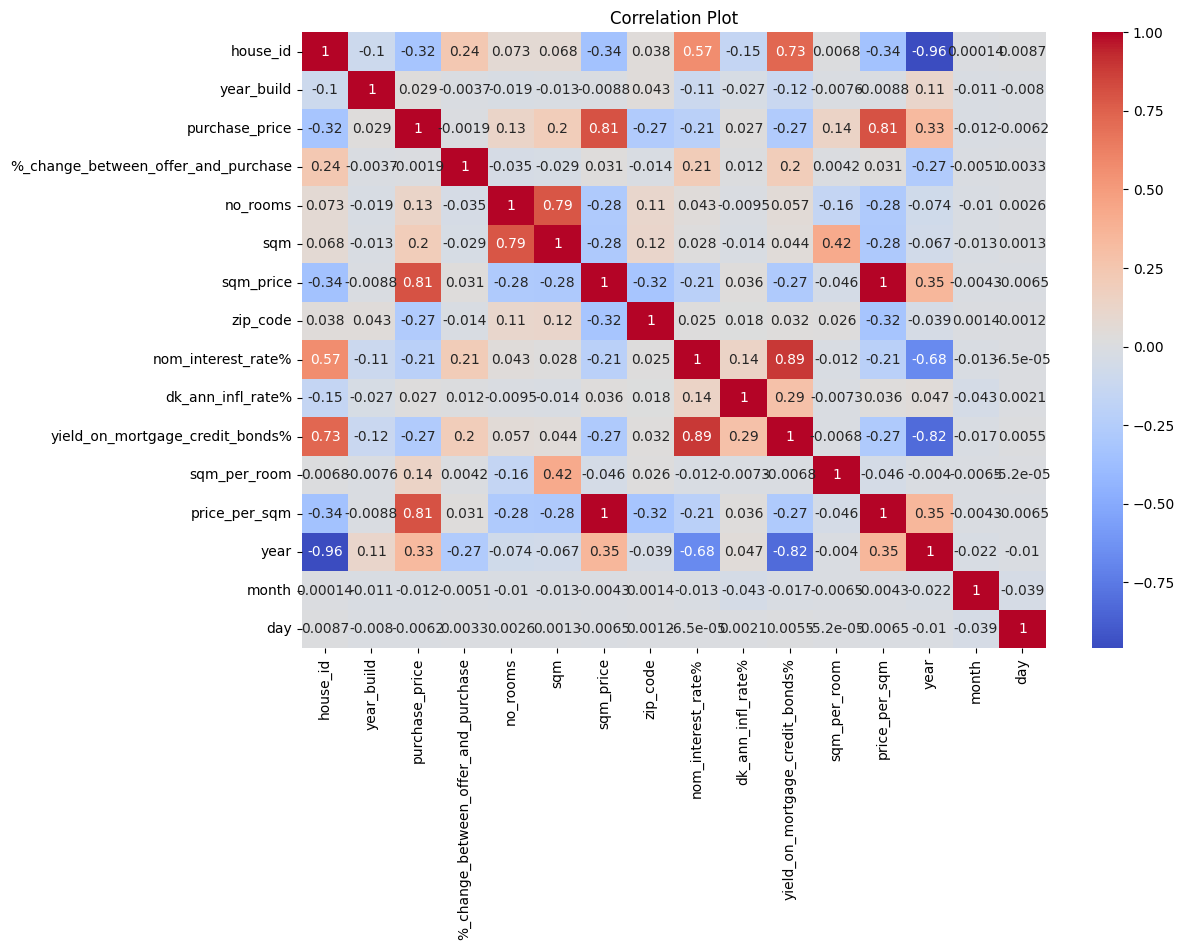

In [41]:
# Plot correlation between independent features and target variable
plt.figure(figsize=(12, 8))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Plot')
plt.show()

### Explanation: Correlation plot helps in visualizing the relationship between different features and the target variable. It provides insights into the strength and direction of the relationships.

## Visualizations and Other Plots for Analysis and Data Preprocessing

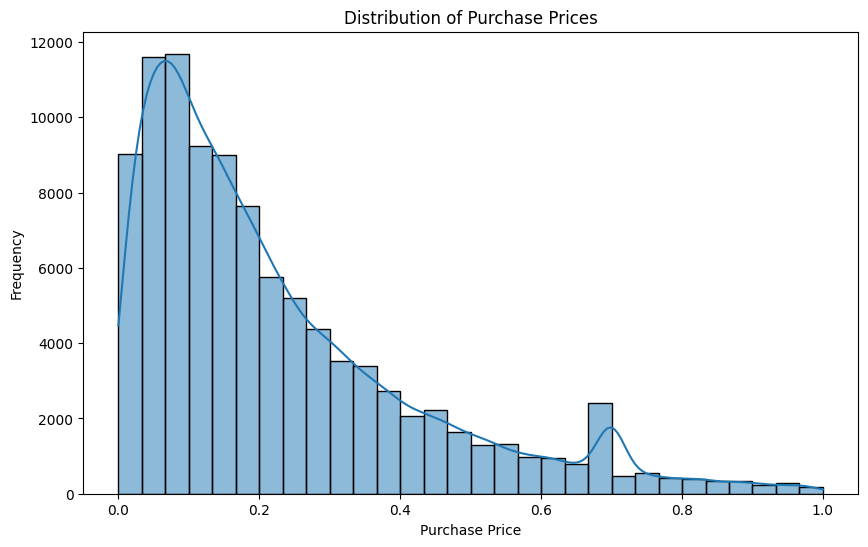

In [42]:
# Distribution of purchase prices
plt.figure(figsize=(10, 6))
sns.histplot(df['purchase_price'], bins=30, kde=True)
plt.title('Distribution of Purchase Prices')
plt.xlabel('Purchase Price')
plt.ylabel('Frequency')
plt.show()

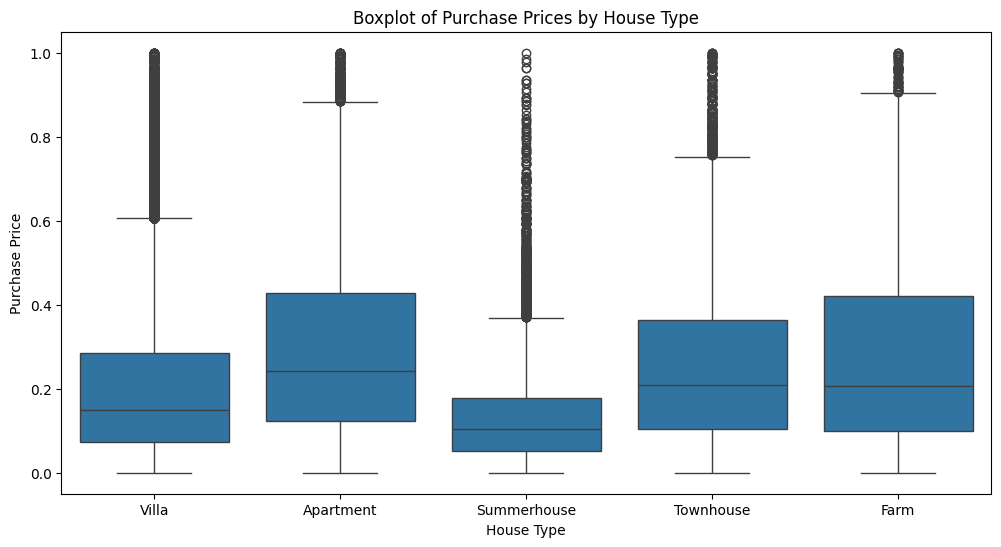

In [43]:
# Boxplot of purchase prices by house type
plt.figure(figsize=(12, 6))
sns.boxplot(x='house_type', y='purchase_price', data=df)
plt.title('Boxplot of Purchase Prices by House Type')
plt.xlabel('House Type')
plt.ylabel('Purchase Price')
plt.show()

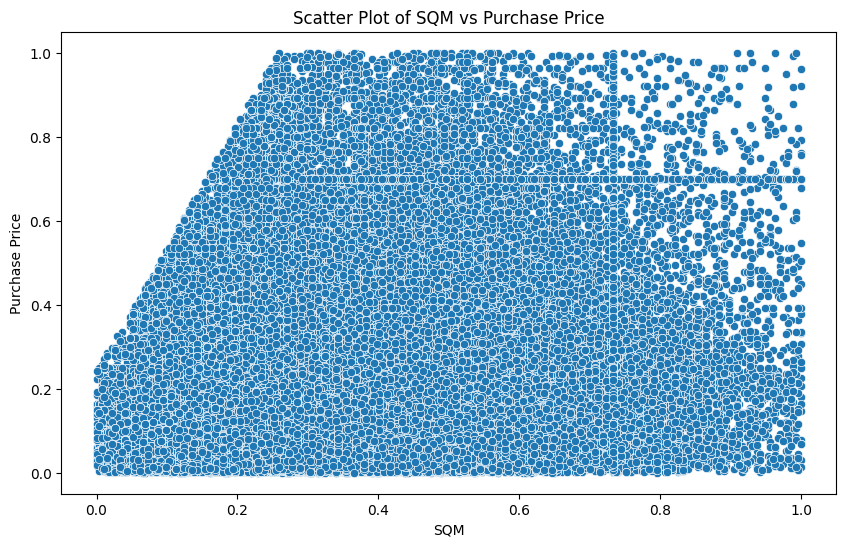

In [44]:
# Scatter plot of sqm vs purchase price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqm', y='purchase_price', data=df)
plt.title('Scatter Plot of SQM vs Purchase Price')
plt.xlabel('SQM')
plt.ylabel('Purchase Price')
plt.show()

### Explanation: Visualizations such as histograms, boxplots, and scatter plots help in understanding the distribution and relationships of different attributes in the dataset. They provide valuable insights for data preprocessing and analysis.

## Summary

The notebook addresses the task of predicting housing prices in Denmark using a dataset of housing transactions. The main challenges include:

Data Cleaning and Preprocessing: The dataset likely contains missing values, inconsistent data formats, and potential outliers that need to be addressed before analysis and modeling.
Feature Engineering: Relevant features need to be extracted or engineered from the existing data to improve model performance. This may involve creating new features based on existing ones or transforming existing features.
Feature Selection: Identifying the most important features for predicting housing prices is crucial to build an effective model and reduce dimensionality.
Data Exploration and Visualization: Understanding the distribution and relationships between features and the target variable (purchase price) is important for gaining insights and informing modeling decisions.
Solution Approach:
The notebook tackles these challenges using a combination of data cleaning, feature engineering, feature selection, and visualization techniques. The overall approach can be summarized as follows:

Data Cleaning: Handling missing values using imputation techniques like KNN for numeric features and mode for categorical features.
Feature Engineering: Creating new features like 'sqm_per_room' and 'price_per_sqm' to capture additional information.
Outlier Handling: Capping outliers using the z-score approach to prevent them from unduly influencing the model.
Normalization: Scaling numeric features using MinMaxScaler to improve model performance.
Feature Selection: Using methods like SelectKBest, RFE, and SequentialFeatureSelector to identify the most important features.
Visualization: Employing various plots like histograms, boxplots, scatter plots, and correlation plots to explore the data and relationships between features.
Detailed Steps Taken:
Here's a breakdown of the steps taken in the notebook:

Data Loading and Initial Exploration: Loading the dataset and examining its structure, including data types and missing values.
Handling Missing Data: Imputing missing values using appropriate techniques based on the type of feature (numeric or categorical).
Feature Engineering: Creating new features that might be relevant for predicting housing prices, such as 'sqm_per_room' and 'price_per_sqm'.
Outlier Handling: Identifying and capping outliers using the z-score approach to mitigate their impact.
Normalization: Scaling numeric features using MinMaxScaler to bring them to a similar range.
Analysis and Visualization: Exploring the data using visualizations to understand distributions, relationships, and potential patterns.
Proximity Measures: Calculating proximity between features to understand their relationships and similarities.
Feature Selection: Applying various feature selection methods to identify the most important features for predicting purchase prices.
Comparison of Feature Selection Methods: Comparing the results of different feature selection methods to gain insights and make informed decisions.
Correlation Plot: Visualizing the correlation between features and the target variable to identify potential relationships.
Understanding the Most Important Feature: Discussing the significance of the most important feature identified through feature selection.
Additional Visualizations: Creating more visualizations to further explore the data and relationships.